# WormLib: open source image analysis library for *C. elegans* 

In [1]:
# Standard library imports
import os
import sys
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt
current_dir = Path().resolve()
src_dir = next(parent / 'src' for parent in Path().absolute().parents if (parent / 'src').is_dir())
sys.path.extend([str(src_dir),])
main_dir = Path(src_dir.parents[0])
import wormlib  # Import first
from wormlib import *
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)
print("Source directory:", src_dir)
print("Main directory:", main_dir)
print("Current working directory:", current_dir)
# models paths
models_dir = main_dir.joinpath('models')
model_2cell_path = models_dir / "2-cell_classification_RFmodel.joblib"
model_4cell_path = models_dir / "4-cell_classification_RFmodel.joblib"

Source directory: /Users/nzlab-la/Desktop/WormLib/src
Main directory: /Users/nzlab-la/Desktop/WormLib
Current working directory: /Users/nzlab-la/Desktop/WormLib/notebooks


In [19]:
import joblib
# Assuming 'model.joblib' is the file where your object was saved
loaded_object = joblib.load(model_4cell_path)
# print the classes in the loaded object
print(loaded_object.classes_)  # Adjust attribute based on the actual object type

['ABa' 'ABb' 'EMS' 'P2']


In [18]:
import importlib
importlib.reload(wormlib)
from wormlib import *

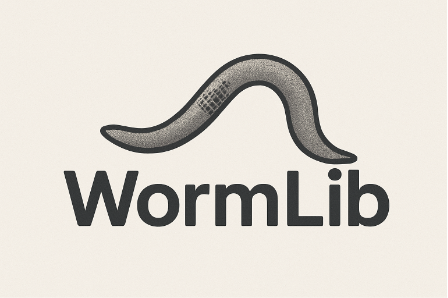

Welcome to WormLib v. 1.0.0


In [3]:
# current working directory using pathlib
logo_path = current_dir.parents[0] / "docs" / "WormLib_logo.png"
display(Image(filename=logo_path))
print("Welcome to WormLib v. 1.0.0")

## 1. Specify input

#### 1.1 Input (use if running as array with bash script; comment otherwise)

#### 1.2 Input (use if running as jupyter notebook; comment otherwise)

In [4]:
# #Specify parameters here if running as jupyter notebook
# 1. Define image path, microscope parameters and channel names (set to None if the channel does not exist)
image_path = main_dir.joinpath("data/08_dv/230521_N2_08_R3D.dv")
image_ref = main_dir.joinpath("data/08_dv/230521_N2_08_R3D_REF.dv")
output_directory = current_dir / f"output_temp"
output_directory.mkdir(parents=True, exist_ok=True)

voxel_size = (1448, 450, 450)   # Microscope pixel size in nm (Z,Y,X)
spot_radius_ch0 = (1409, 340, 340)  # PSF Z,Y,X #Settings used for mCherry channel
spot_radius_ch1 = (1283, 310, 310)  # PSF Z,Y,X #Settings used for Cy5 channel

# Define channel names dictionary
channel_names = {
    'Cy5': "mRNA1",      # (Q670)
    'mCherry': "mRNA2",  # (Q610)
    'FITC': None,        # (GFP) - set to None if not used
    'DAPI': "DAPI",
    'brightfield': "brightfield"
}

# Extract individual channel names for backward compatibility
Cy5 = channel_names['Cy5']
mCherry = channel_names['mCherry']
FITC = channel_names['FITC']
DAPI = channel_names['DAPI']
brightfield = channel_names['brightfield']

# 2. Segmentation parameters
run_embryo_segmentation = True
embryo_diameter = 500
nuclei_diameter = 70
run_cell_segmentation = True
cell_diameter = 250
run_cell_classifier = True

# 3. Spot detection
run_spot_detection = True

# 4. Spatial analysis of mRNA
run_mRNA_heatmaps = True
run_rna_density_analysis = True
run_line_scan_analysis = True

# 5. Specify where the data will be stored in the current directory create a new folder "output_"+ ""


Detected DeltaVision (.dv) images
Image ID: 230521_N2_08

Image shape: (1024, 1024)
Loaded 2D brightfield image


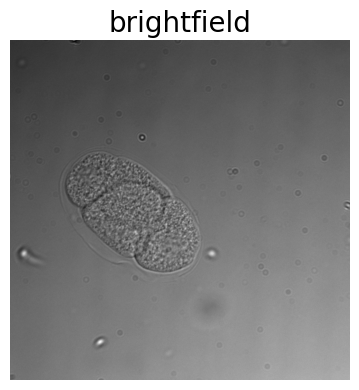

Detected DeltaVision (.dv) images
Image ID: 230521_N2_08

Image shape: (4, 36, 1024, 1024)
Loaded 4D color channel stack


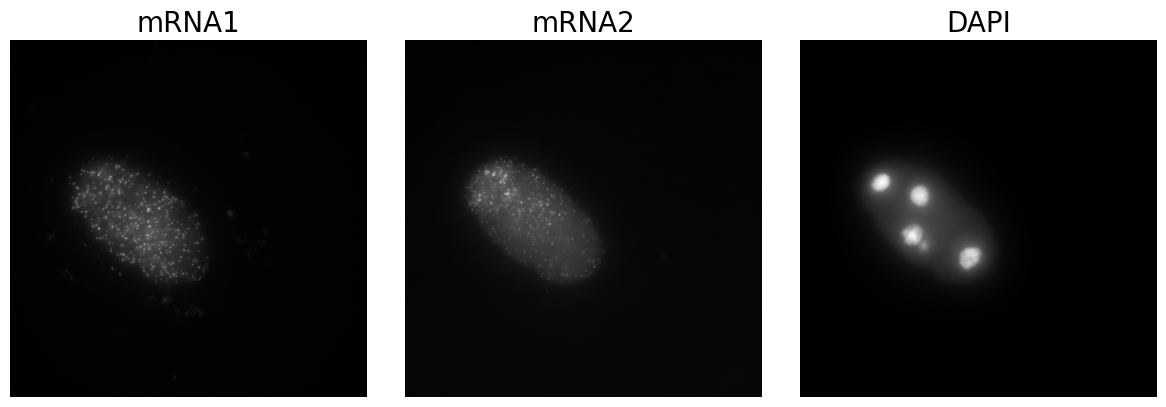


Loaded brightfield from dv successfully!
Image name: 230521_N2_08

Loaded color channels successfully!


In [5]:

# 6. Load images separately - brightfield first, then colors
# Load brightfield
bf_result = load_images(
    image_path=str(image_ref),
    output_directory=output_directory,
    channel_names={'brightfield': 'brightfield'},
    slice_to_plot=12
)

# Load colors
color_result = load_images(
    image_path=str(image_path),
    output_directory=output_directory,
    channel_names={'Cy5': "mRNA1", 'mCherry': "mRNA2", 'FITC': None, 'DAPI': "DAPI"},
    slice_to_plot=12
)

# Combine results - FIX: Check each result separately
if bf_result is not None:
    image_type = bf_result['image_type']
    image_name = bf_result['image_name']
    bf = bf_result['bf']
    print(f"\nLoaded brightfield from {image_type} successfully!")
    print(f"Image name: {image_name}")
else:
    print("Failed to load brightfield.")
    bf = None

if color_result is not None:
    # Get color channels from color_result (not bf_result!)
    image_Cy5 = color_result['image_Cy5']
    image_mCherry = color_result['image_mCherry']
    image_FITC = color_result['image_FITC']
    image_nuclei = color_result['image_nuclei']
    Cy5_array = color_result['Cy5_array']
    mCherry_array = color_result['mCherry_array']
    FITC_array = color_result['FITC_array']
    nuclei_array = color_result['nuclei_array']
    grid_width = color_result['grid_width']
    grid_height = color_result['grid_height']
    print(f"\nLoaded color channels successfully!")

In [6]:
output_directory

PosixPath('/Users/nzlab-la/Desktop/WormLib/notebooks/output_temp')

/opt/anaconda3/envs/wormlib/lib/python3.12/site-packages/cellpose/resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_lo

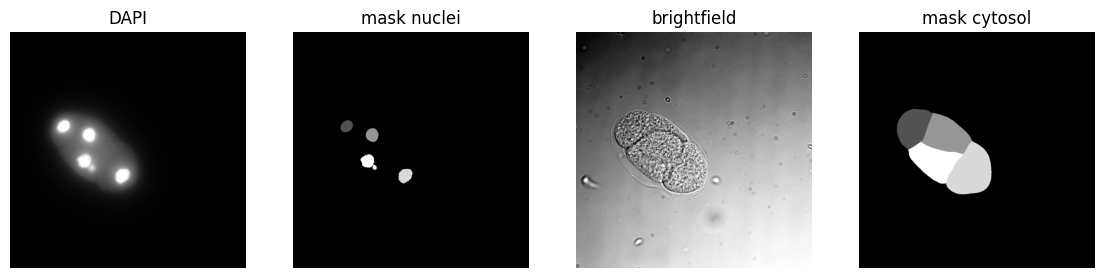

In [7]:
###### # Run cell segmentation function but default to embryo segmentation if longer than 10 min (time coditional):
image_cytosol = bf
second_image_cytosol = image_nuclei
masks_cytosol, masks_nuclei, list_masks_cyto_sizes, list_masks_nuc_sizes = segmentation(image_cytosol, image_nuclei, second_image_cytosol, output_directory=output_directory)
# Save segmentation figure
segmentation_filename = os.path.join(output_directory, f'cell_segmentation_{image_name}.png')
plt.savefig(segmentation_filename)



In [8]:
cell_stage, nuclei_sizes, masks_filtered = get_cell_stage_and_size_filtered(masks_nuclei,voxel_size)

Detected 4 nuclei after filtering → Stage: 4-cell
run_2cell_classifier = False
run_4cell_classifier = True
run_embryo_segmentation = False


In [9]:
# Run 2-cell classifier
if cell_stage == "2-cell" and run_cell_classifier:
    features_df = classify_2cell(
        masks_cytosol=masks_cytosol,
        bf=bf,
        image_name=image_name,
        output_directory=output_directory,
        model_path=model_2cell_path,
        verbose=True
    )
else:
    print("Skipping 2-cell classifier...")

Skipping 2-cell classifier...


Model classes: ['ABa', 'ABb', 'EMS', 'P2']
[classify_4cell] Using alias 'ABb' for expected class 'ABp'.


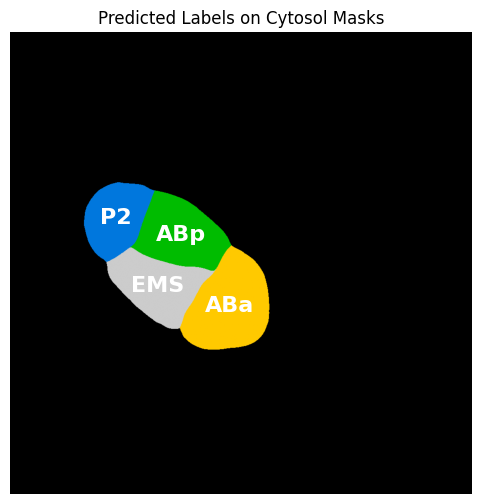

   label     area   perimeter  eccentricity  solidity    extent  \
0      1  18741.0  547.221392      0.708331  0.985383  0.674404   
1      2  24432.0  652.553391      0.705018  0.965654  0.610037   
2      3  31110.0  703.352380      0.678353  0.982628  0.676760   
3      4  23181.0  680.530050      0.758933  0.880102  0.522742   

   major_axis_length  minor_axis_length  mean_intensity  bbox-0  ...  \
0         185.757050         131.122328      556.475161     333  ...   
1         213.981565         151.753366      608.308325     351  ...   
2         236.627033         173.858336      662.675988     473  ...   
3         223.878665         145.782823      609.696778     477  ...   

   medianf_std  medianf_median  initial_prediction  prediction_confidence  \
0    16.551607           163.0                  P2                   0.49   
1    19.958318           179.0                 ABa                   0.61   
2    19.519440           196.0                 ABa                   0.5

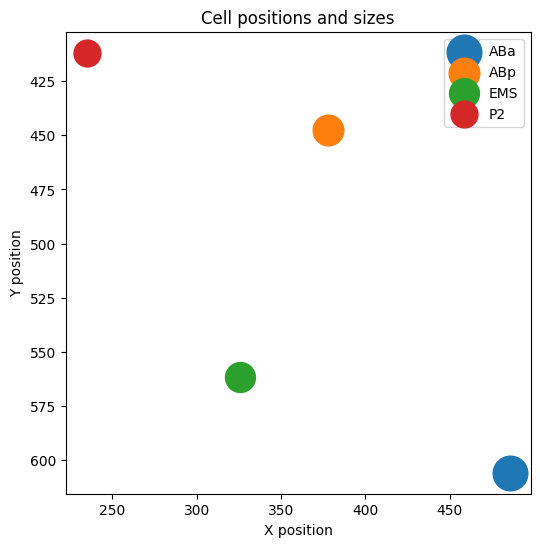

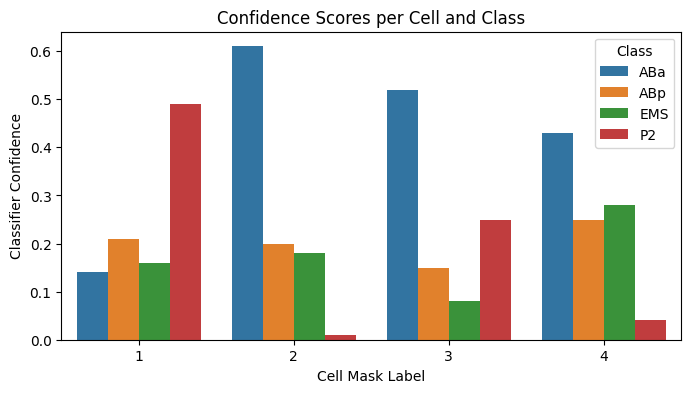

In [20]:
# Run 4-cell classifier
if cell_stage == "4-cell" and run_cell_classifier:
    features_df = classify_4cell(
        masks_cytosol=masks_cytosol,
        bf=bf,
        image_name=image_name,
        output_directory=output_directory,
        model_path=model_4cell_path,
        verbose=True
    )
else:
    print("Skipping 4-cell classifier...")

In [ ]:
raise SystemExit    

## 2. Load image(s)

## 3. Segmentation

#### 3.1 Single cell segmentation (optimized for <4-cell embryos)

#### 3.2 Cell stage sorting

In [ ]:
# #Sort images based on nuclei
def get_cell_stage_and_size_filtered(masks_nuclei, min_fraction_median=0.2):
    # Label connected components
    labeled_mask, num_nuclei = label(masks_nuclei, return_num=True)
    
    # XY pixel size in nm
    pixel_size_xy = voxel_size[1]
    
    # First pass: get all areas
    all_areas = np.array([region.area for region in regionprops(labeled_mask)])
    if len(all_areas) == 0:
        print("No nuclei detected")
        return "no-nuclei", [], np.zeros_like(masks_nuclei)  # <-- modified to return 3 values
    
    median_area = np.median(all_areas)
    min_area_pixels = median_area * min_fraction_median  # dynamically filter small outliers
    
    # Map number of nuclei to stage (after filtering)
    filtered_mask = np.zeros_like(labeled_mask)
    nuclei_sizes = []
    label_idx = 1
    for region in regionprops(labeled_mask):
        if region.area < min_area_pixels:
            continue  # skip very small outliers
        
        # keep in filtered mask
        filtered_mask[labeled_mask == region.label] = label_idx
        
        # Approximate diameter in pixels (assume circular)
        diameter_pixels = 2 * np.sqrt(region.area / np.pi)
        area_um2 = region.area * (pixel_size_xy / 1000)**2
        diameter_um = diameter_pixels * (pixel_size_xy / 1000)
        
        nuclei_sizes.append({
            "label": label_idx,
            "area_pixels": region.area,
            "diameter_pixels": diameter_pixels,
            "area_um2": area_um2,
            "diameter_um": diameter_um
        })
        label_idx += 1
    
    # Determine cell stage based on filtered nuclei
    num_filtered = len(nuclei_sizes)
    stage_map = {1: "1-cell", 2: "2-cell", 4: "4-cell"}
    stage = stage_map.get(num_filtered, f"{num_filtered}-cell")
    
    print(f"Detected {num_filtered} nuclei after filtering → Stage: {stage}")
    
    return stage, nuclei_sizes, filtered_mask


# Usage
if run_cell_segmentation:
    cell_stage, nuclei_sizes, masks_filtered = get_cell_stage_and_size_filtered(masks_nuclei)

run_2cell_classifier = False
run_4cell_classifier = False
run_embryo_segmentation = False  # make sure this is initialized

if run_cell_classifier:
    if cell_stage in ["no-nuclei"]:
        run_embryo_segmentation = True
        run_cell_classifier=False
    elif cell_stage == "2-cell":
        run_2cell_classifier = True
    elif cell_stage == "4-cell":
        run_4cell_classifier = True
    else:
        run_embryo_segmentation = True
        run_cell_classifier=False
else:
    print("Skipped classifier")
    
print(f"run_2cell_classifier = {run_2cell_classifier}")
print(f"run_4cell_classifier = {run_4cell_classifier}")
print(f"run_embryo_segmentation = {run_embryo_segmentation}")


#### 3.3 Classify masks with biological names

##### 3.3.1 (2-cell) AB-P1-cell classifier

In [ ]:
### 2-cell classifier

# Suppress just the InconsistentVersionWarning
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

if run_2cell_classifier:
    # --- Extract features of unseen brightfield image for classification ---
    props_unseen = regionprops_table(
        masks_cytosol,
        intensity_image=bf,
        properties=[
            'label', 'area', 'perimeter', 'eccentricity', 'solidity', 'extent',
            'major_axis_length', 'minor_axis_length', 'mean_intensity',
            'bbox', 'centroid', 'orientation'
        ]
    )

    # Convert to DataFrame
    features_df = pd.DataFrame(props_unseen)

    # Rename centroids for convenience
    features_df['centroid_y'] = features_df['centroid-0']
    features_df['centroid_x'] = features_df['centroid-1']

    # Load trained Random Forest model
    rf = joblib.load("models/2-cell_classification_RFmodel.joblib")

    # --- Select the features used during training ---
    X_new = features_df[
        [
            'area', 'perimeter', 'eccentricity', 'solidity', 'extent',
            'major_axis_length', 'minor_axis_length', 'mean_intensity',
            'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3',
            'centroid-0', 'centroid-1',
            'orientation'
        ]
    ]

    # --- Predict cell type and probabilities ---
    predictions = rf.predict(X_new)
    proba = rf.predict_proba(X_new)
    classes = rf.classes_

    # --- Get confidence scores ---
    predicted_class_indices = [list(classes).index(pred) for pred in predictions]
    prediction_confidence = [proba[i][idx] for i, idx in enumerate(predicted_class_indices)]

    # Add predictions and confidence to dataframe
    features_df["initial_prediction"] = predictions
    features_df["prediction_confidence"] = prediction_confidence
    
    # --- Fit ellipse to entire embryo ---
    binary_image = (masks_cytosol > 0).astype(np.uint8)
    contours = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    if contours and len(contours[0]) >= 5:
        cnt = max(contours, key=cv2.contourArea)
        ellipse = cv2.fitEllipse(cnt)
        (xc, yc), (d1, d2), angle = ellipse  # center, axes, rotation
        theta = np.deg2rad(angle)
        minor_axis_vec = np.array([-np.sin(theta), np.cos(theta)])  # along minor axis

        # Compute relative minor-axis positions for each cell
        rel_positions = []
        for _, row in features_df.iterrows():
            centroid = np.array([row['centroid_x'], row['centroid_y']])
            vec_from_center = centroid - np.array([xc, yc])
            rel_pos_minor = np.dot(vec_from_center, minor_axis_vec) / d2  # normalized
            rel_positions.append(rel_pos_minor)
        features_df['rel_pos_minor'] = rel_positions

    # ---- Fail-safe logic: Ensure exactly one AB and one P1 ----
    ab_idx = list(classes).index("AB")
    p1_idx = list(classes).index("P1")

    # Rank cells by their AB and P1 confidence
    features_df["AB_conf"] = proba[:, ab_idx]
    features_df["P1_conf"] = proba[:, p1_idx]

    # Assign highest AB_conf as AB, highest P1_conf as P1
    ab_row = features_df.loc[features_df["AB_conf"].idxmax()]
    p1_row = features_df.loc[features_df["P1_conf"].idxmax()]

    # Assign labels
    features_df["highest_confidence_label"] = "Unassigned"
    features_df.loc[ab_row.name, "highest_confidence_label"] = "AB"
    features_df.loc[p1_row.name, "highest_confidence_label"] = "P1"
    
    # --- Extract AB and P1 masks ---
    ab_mask = (masks_cytosol == ab_row['label'])
    p1_mask = (masks_cytosol == p1_row['label'])

    # Dilate slightly to ensure boundary contact detection
    ab_dilated = binary_dilation(ab_mask, iterations=1)
    p1_dilated = binary_dilation(p1_mask, iterations=1)

    touching = np.any(ab_dilated & p1_mask) or np.any(p1_dilated & ab_mask)

    if not touching:
        print(f"Fail-safe triggered for {image_name}: AB and P1 are not touching.")
        features_df.loc[ab_row.name, "highest_confidence_label"] = "Unassigned"
        features_df.loc[p1_row.name, "highest_confidence_label"] = "Unassigned"
        features_df["nearby_cells"] = False
    else:
        features_df["nearby_cells"] = True

    # --- Plot prediction labels ---
    mask_image = np.max(masks_cytosol, axis=0) if masks_cytosol.ndim == 3 else masks_cytosol
    plt.figure(figsize=(6, 6))
    plt.imshow(mask_image, cmap='nipy_spectral')
    plt.axis('off')

    for _, row in features_df.iterrows():
        label = row['label']
        pred_label = row['highest_confidence_label']
        y, x = center_of_mass(mask_image == label)
        plt.text(x, y, pred_label, color='white', fontsize=16,
                 ha='center', va='center', weight='bold')

    plt.title("Predicted Labels on Cytosol Masks")
    predicted_label_filename = os.path.join(output_directory, f'predicted_label_{image_name}.png')
    plt.savefig(predicted_label_filename, dpi=300, bbox_inches='tight')
    plt.show()

    # --- Save outputs ---
    features_df_output = os.path.join(output_directory, f'features_df_{image_name}.csv')
    features_df.to_csv(features_df_output, index=False)

    print(features_df.tail())
    
    # --- Plot cell centroid position ---
    plt.figure(figsize=(6,6))
    for label, group in features_df.groupby('highest_confidence_label'):
        plt.scatter(group['centroid_x'], group['centroid_y'], 
                    s=group['area']/100, label=label)

    plt.gca().invert_yaxis()  # Match image coordinates
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.title("Cell positions and sizes")

    # Move legend outside the plot
    plt.legend(title="Cell Type", loc='center left', bbox_to_anchor=(1, 0.7))

    # Save figure
    centroid_position_plot_filename = os.path.join(output_directory, f'centroid_position_plot_{image_name}.png')
    plt.savefig(centroid_position_plot_filename, dpi=300, bbox_inches='tight')
    plt.show()


    # --- Plot prediction confidence ---
    conf_cols = ['AB_conf', 'P1_conf']
    conf_df = features_df.melt(id_vars='label', value_vars=conf_cols,
                               var_name='class', value_name='confidence')
    conf_df['class'] = conf_df['class'].str.replace('_conf','')

    plt.figure(figsize=(8,4))
    sns.barplot(data=conf_df, x='label', y='confidence', hue='class')
    plt.ylabel("Classifier Confidence")
    plt.xlabel("Cell Mask Label")
    plt.title("Confidence Scores per Cell and Class")
    plt.legend(title="Class")
    cell_confidence_plot_filename = os.path.join(output_directory, f'cell_confidence_plot_{image_name}.png')
    plt.savefig(cell_confidence_plot_filename, dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Skipping 2-cell classifier...")

##### 3.3.2 (4-cell) ABa, ABp, EMS, P2 classifier

In [ ]:
### 4-cell classifier

# Suppress just the InconsistentVersionWarning
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

if run_4cell_classifier:
    # --- Extract base features ---
    props_unseen = regionprops_table(
        masks_cytosol,
        intensity_image=bf,
        properties=[
            'label', 'area', 'perimeter', 'eccentricity', 'solidity', 'extent',
            'major_axis_length', 'minor_axis_length', 'mean_intensity',
            'bbox', 'centroid', 'orientation'
        ]
    )
    features_df = pd.DataFrame(props_unseen)
    # --- define centroid_x / centroid_y ---
    features_df['centroid_y'] = features_df['centroid-0']
    features_df['centroid_x'] = features_df['centroid-1']

    # --- Apply filters once to whole BF image ---
    bf_float = img_as_float(bf)
    smooth = filters.gaussian(bf_float, sigma=1)
    sobel_edges = filters.sobel(smooth)
    median_filtered = filters.rank.median(
        (bf / bf.max() * 255).astype(np.uint8),
        disk(3)
    )

    # --- Add per-cell filtered stats ---
    extra_features = []
    for lbl in features_df['label']:
        mask = (masks_cytosol == lbl)
        extra_features.append({
            "smooth_mean": np.mean(smooth[mask]),
            "smooth_std": np.std(smooth[mask]),
            "smooth_median": np.median(smooth[mask]),
            "sobel_mean": np.mean(sobel_edges[mask]),
            "sobel_std": np.std(sobel_edges[mask]),
            "sobel_median": np.median(sobel_edges[mask]),
            "medianf_mean": np.mean(median_filtered[mask]),
            "medianf_std": np.std(median_filtered[mask]),
            "medianf_median": np.median(median_filtered[mask])
        })
    extra_df = pd.DataFrame(extra_features)
    features_df = pd.concat([features_df, extra_df], axis=1)

    # --- Load model ---
    rf = joblib.load("models/4-cell_classification_RFmodel.joblib")

    # --- Match training feature order ---
    X_new = features_df[
        [
            'area', 'perimeter', 'eccentricity', 'solidity', 'extent',
            'major_axis_length', 'minor_axis_length', 'mean_intensity',
            'bbox-0', 'bbox-1', 'bbox-2', 'bbox-3',
            'centroid-0', 'centroid-1',
            'orientation',
            'smooth_mean', 'smooth_std', 'smooth_median',
            'sobel_mean', 'sobel_std', 'sobel_median',
            'medianf_mean', 'medianf_std', 'medianf_median'
        ]
    ]

    # --- Predict ---
    proba = rf.predict_proba(X_new)
    classes = rf.classes_
    initial_preds = rf.predict(X_new)

    # --- Confidence scores ---
    predicted_class_indices = [list(classes).index(pred) for pred in initial_preds]
    prediction_confidence = [proba[i][idx] for i, idx in enumerate(predicted_class_indices)]
    features_df["initial_prediction"] = initial_preds
    features_df["prediction_confidence"] = prediction_confidence

    # --- Confidence for each class ---
    for cname in ["ABa", "ABp", "EMS", "P2"]:
        features_df[f"{cname}_conf"] = proba[:, list(classes).index(cname)]

    # --- Fail-safe: ensure one label per class ---
    features_df["highest_confidence_label"] = "Unassigned"
    for cname in ["ABa", "ABp", "EMS", "P2"]:
        features_df.loc[features_df[f"{cname}_conf"].idxmax(), "highest_confidence_label"] = cname

    # --- Positional fail-safe using ellipse ---
    # Fit ellipse to entire embryo
    binary_image = (masks_cytosol > 0).astype(np.uint8)
    contours = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    if contours and len(contours[0]) >= 5:
        cnt = max(contours, key=cv2.contourArea)
        ellipse = cv2.fitEllipse(cnt)
        (xc, yc), (d1, d2), angle = ellipse  # center, axes, rotation
        theta = np.deg2rad(angle)
        minor_axis_vec = np.array([-np.sin(theta), np.cos(theta)])  # along minor axis

        # Compute relative minor-axis positions for each cell
        rel_positions = []
        for idx, row in features_df.iterrows():
            centroid = np.array([row['centroid_x'], row['centroid_y']])
            vec_from_center = centroid - np.array([xc, yc])
            rel_pos_minor = np.dot(vec_from_center, minor_axis_vec) / d2  # normalized
            rel_positions.append(rel_pos_minor)
        features_df['rel_pos_minor'] = rel_positions

        # Assign ABa / P2 at ends
        left_cell = features_df.loc[features_df['rel_pos_minor'].idxmin()]
        right_cell = features_df.loc[features_df['rel_pos_minor'].idxmax()]
        if left_cell['area'] > right_cell['area']:
            features_df.loc[left_cell.name, 'highest_confidence_label'] = 'ABa'
            features_df.loc[right_cell.name, 'highest_confidence_label'] = 'P2'
        else:
            features_df.loc[left_cell.name, 'highest_confidence_label'] = 'P2'
            features_df.loc[right_cell.name, 'highest_confidence_label'] = 'ABa'

        # Middle cells: EMS = smaller, ABp = larger
        middle_cells = features_df.drop([left_cell.name, right_cell.name])
        ems_cell = middle_cells.loc[middle_cells['area'].idxmin()]
        abp_cell = middle_cells.loc[middle_cells['area'].idxmax()]
        features_df.loc[ems_cell.name, 'highest_confidence_label'] = 'EMS'
        features_df.loc[abp_cell.name, 'highest_confidence_label'] = 'ABp'

    # --- Plot results ---
    mask_image = np.max(masks_cytosol, axis=0) if masks_cytosol.ndim == 3 else masks_cytosol
    plt.figure(figsize=(6, 6))
    plt.imshow(mask_image, cmap='nipy_spectral')
    plt.axis('off')

    for idx, row in features_df.iterrows():
        y, x = center_of_mass(mask_image == row['label'])
        plt.text(x, y, row['highest_confidence_label'], color='white',
                 fontsize=16, ha='center', va='center', weight='bold')

    plt.title("Predicted Labels on Cytosol Masks")

    # --- Save outputs ---
    features_df_output = os.path.join(output_directory, f'features_df_{image_name}.csv')
    features_df.to_csv(features_df_output, index=False)
    predicted_label_filename = os.path.join(output_directory, f'predicted_label_{image_name}.png')
    plt.savefig(predicted_label_filename, dpi=300, bbox_inches='tight')
    plt.show()

    print(features_df.tail())

   ## plot cell centroid position
    plt.figure(figsize=(6,6))
    for label, group in features_df.groupby('highest_confidence_label'):
        plt.scatter(group['centroid_x'], group['centroid_y'], 
                    s=group['area']/50, label=label)

    plt.gca().invert_yaxis()  # Match image coordinates
    plt.xlabel("X position")
    plt.ylabel("Y position")
    plt.legend()
    plt.title("Cell positions and sizes")
    plt.show()
    
    # Save the figure
    centroid_position_plot_filename = os.path.join(output_directory, f'centroid_position_plot_{image_name}.png')
    plt.savefig(centroid_position_plot_filename, dpi=300, bbox_inches='tight')
    plt.show()



    ### plot prediction confidence per cell
    # Reshape dataframe for plotting
    conf_cols = ['ABa_conf', 'ABp_conf', 'EMS_conf', 'P2_conf']
    conf_df = features_df.melt(id_vars='label', value_vars=conf_cols,
                               var_name='class', value_name='confidence')

    # Strip "_conf" from class names
    conf_df['class'] = conf_df['class'].str.replace('_conf','')

    plt.figure(figsize=(8,4))
    sns.barplot(data=conf_df, x='label', y='confidence', hue='class')
    plt.ylabel("Classifier Confidence")
    plt.xlabel("Cell Mask Label")
    plt.title("Confidence Scores per Cell and Class")
    plt.legend(title="Class")
    plt.show()
    
    # Save the figure
    cell_confidence_plot_filename = os.path.join(output_directory, f'cell_confidence_plot_{image_name}.png')
    plt.savefig(cell_confidence_plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("Skipping 4-cell classifier...")

#### 3.4 Embryo Segementation

In [ ]:
## Embryo segmentation

def keep_largest_region(mask):
    labels = measure.label(mask)
    props = measure.regionprops(labels)
    if not props:
        return mask * 0  # return empty if nothing found
    largest_region = max(props, key=lambda x: x.area)
    return (labels == largest_region.label).astype(np.uint16)

def embryo_segmentation(bf, image_nuclei, image_name, output_directory):
    cytosol_image = bf[..., 0] if bf.ndim == 3 else bf
    nuclei_image = image_nuclei[..., 0] if image_nuclei.ndim == 3 else image_nuclei

    # Run Cellpose for cytosol (large object: the embryo)
    model_cyto = models.Cellpose(model_type='cyto')
    masks_cytosol, _, _, _ = model_cyto.eval(
        cytosol_image, diameter=embryo_diameter, channels=[0, 0]
    )
    masks_cytosol = keep_largest_region(masks_cytosol)

    # Run Cellpose for nuclei (smaller, multiple objects)
    model_nuclei = models.Cellpose(model_type='cyto2')
    masks_nuclei, _, _, _ = model_nuclei.eval(
        nuclei_image, diameter=nuclei_diameter, channels=[0, 0],
        cellprob_threshold=0.0, flow_threshold=0.2
    )
    
    # --- Post-processing: remove size outliers ---
    labeled_nuc = label(masks_nuclei)
    props = regionprops(labeled_nuc)
    areas = np.array([p.area for p in props])

    if len(areas) > 0:
        median_area = np.median(areas)
        min_area_threshold = 0.5 * median_area  # tune 0.4-0.6 if needed
        max_area_threshold = 2.0 * median_area  # optional: remove huge artifacts

        masks_nuclei_filtered = np.zeros_like(labeled_nuc)
        label_idx = 1
        for p in props:
            if min_area_threshold <= p.area <= max_area_threshold:
                masks_nuclei_filtered[labeled_nuc == p.label] = label_idx
                label_idx += 1

        masks_nuclei = masks_nuclei_filtered
    
    # Get outlines
    outlines_cytosol = utils.outlines_list(masks_cytosol)
    outlines_nuclei = utils.outlines_list(masks_nuclei)

    # Compute sizes
    labeled_cyto = label(masks_cytosol.astype(np.uint16))
    masks_cyto_sizes = [prop.area for prop in regionprops(labeled_cyto)]
    masks_nuc_sizes = [prop.area for prop in regionprops(masks_nuclei)]

    # Plot side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(cytosol_image, cmap='gray')
    for o in outlines_cytosol:
        ax[0].plot(o[:, 0], o[:, 1], color='lime', linewidth=1)
    ax[0].set_title('Embryo Mask')
    ax[0].axis('off')

    ax[1].imshow(nuclei_image, cmap='gray')
    for o in outlines_nuclei:
        ax[1].plot(o[:, 0], o[:, 1], color='deepskyblue', linewidth=1)
    ax[1].set_title('Nuclei Mask')
    ax[1].axis('off')

    # Create binary mask for embryo outline
    image_shape = cytosol_image.shape
    embryo_outline = np.zeros(image_shape, dtype=bool)
    for outline in outlines_cytosol:
        poly_mask = polygon2mask(image_shape, outline[:, ::-1])
        embryo_outline |= poly_mask

    # Save cyto masks as arrays
    masks_cytosol = np.array(masks_cytosol)
    tiff.imwrite(os.path.join(output_directory, "masks_cytosol.tif"), masks_cytosol.astype(masks_cytosol.dtype))
    
    # Save figure
    segmentation_filename = os.path.join(output_directory, f'embryo_segmentation_{image_name}.png')
    plt.savefig(segmentation_filename)
    plt.tight_layout()
    plt.show()
    plt.close()

    return masks_cytosol, masks_nuclei, masks_cyto_sizes, masks_nuc_sizes

if run_embryo_segmentation:
    masks_cytosol, masks_nuclei, masks_cyto_sizes, masks_nuc_sizes = embryo_segmentation(
        bf, image_nuclei, image_name, output_directory
    )
else:
    print("Skipping embryo segmentation...")

## 4. Spot detection

#### 4.1 Automated threshold selection and spot detection

In [ ]:
def spot_detection(rna,voxel_size,spot_radius,masks_cytosol):
    spots, threshold = detection.detect_spots(
        images= rna,
        return_threshold=True,
        voxel_size=voxel_size,
        spot_radius=spot_radius) 

    spot_radius_px = detection.get_object_radius_pixel(
        voxel_size_nm=voxel_size,
        object_radius_nm=spot_radius,
        ndim=3) 

    # LoG filter
    rna_log = stack.log_filter(rna, sigma=spot_radius_px)

    # local maximum detection
    mask = detection.local_maximum_detection(rna_log, min_distance=spot_radius_px)

    # thresholding
    threshold = detection.automated_threshold_setting(rna_log, mask)
    spots, _ = detection.spots_thresholding(rna_log, mask, threshold)


    # Decompose regions by simulating as many spots as possible until we match the original region intensity.
    #spots_post_decomposition = spots.copy()
    spots_post_decomposition, dense_regions, reference_spot = detection.decompose_dense(
        image=rna,
        spots=spots,
        voxel_size=voxel_size,
        spot_radius=spot_radius,
        alpha=0.7,  # alpha impacts the number of spots per candidate region
        beta=1,  # beta impacts the number of candidate regions to decompose
        gamma=5)  # gamma the filtering step to denoise the image

    # define clusters
    spots_post_clustering, clusters = detection.detect_clusters(
        spots=spots_post_decomposition,
        voxel_size=voxel_size,
        radius=1136, #626 #1000
        nb_min_spots=5) #10

   # plotting
    print(f"Image ID: {image_name} \n")
    print(f"{rna_channel} detection")
    print(f" threshold: {threshold}")
    print("\r spots: {0}".format(spots_post_clustering.shape[0]))
    print("\r clusters: {0}".format(clusters.shape[0]))
   
        #elbow plot
    threshold_output = os.path.join(output_directory, rna_channel + '_threshold_' + image_name)
    plot.plot_elbow(
        images=rna,
        voxel_size=voxel_size,
        spot_radius=spot_radius,
        size_axes=8,
        framesize=(5, 3),
        title=(f"{rna_channel} detection threshold"),
        size_title=12,
        path_output=threshold_output,
        show=True  # Set show to False to hide the plot
    )

      
    #    # Save the plots in the results folder
    detection_output = os.path.join(output_directory, rna_channel + '_detection_' + image_name)
    plot.plot_detection(
        image=np.max(rna, axis=0),
        spots=[spots_post_decomposition, clusters[:, :3]],
        shape=["circle", "circle"],
        radius=[1, 4],
        color=detection_color,
        linewidth=[3, 2],
        fill=[False, True],
        contrast=True,
        framesize=(10, 5),
        title=(f"{rna_channel} detection"),
        path_output= detection_output,
        show=True
    )


    #spots_no_ts, _, ts = multistack.remove_transcription_site(spotDetectionCSV, clusterDetectionCSV, mask_nuc, ndim=3)
    #spots_in_region, _ = multistack.identify_objects_in_region(mask, spots_post_clustering[:,:3], ndim=3)

    # Separating and counting the spots in each cell
    number_masks_cyto = np.max(masks_cytosol)
    list_spots_in_each_cell =[]
    list_clusters_in_each_cell =[]
    for i in range (1, number_masks_cyto+1):
        temp_cyto_mask= np.zeros_like(masks_cytosol)
        temp_cyto_mask[masks_cytosol == i] = i
        spots_in_region, _ = multistack.identify_objects_in_region(mask=temp_cyto_mask, coord=spots_post_clustering[:,:3], ndim=3)
        clusters_in_region,_ = multistack.identify_objects_in_region(mask=temp_cyto_mask, coord=clusters[:,:3], ndim=3)
        list_spots_in_each_cell.append(len(spots_in_region))
        list_clusters_in_each_cell.append(len( clusters_in_region ))
        del spots_in_region, clusters_in_region
    return spots_post_clustering, clusters, list_spots_in_each_cell, list_clusters_in_each_cell

if run_spot_detection:
    if Cy5 is not None and image_Cy5 is not None:
        rna_ch0 = Cy5_array # [Z,Y,X,C]
    #     rna_ch0 = rna_ch0.astype(np.uint16)
        rna_channel = Cy5
        detection_color = "red"
        spots_post_clustering_ch0, clusters_ch0,list_spots_in_each_cell_ch0,list_clusters_in_each_cell_ch0 = spot_detection(rna_ch0,voxel_size,spot_radius_ch0,masks_cytosol)

    if mCherry is not None and image_mCherry is not None:
        rna_ch1 = mCherry_array # [Z,Y,X,C]
    #     rna_ch1 = rna_ch1.astype(np.uint16)
        rna_channel = mCherry
        detection_color = "blue"
        spots_post_clustering_ch1, clusters_ch1,list_spots_in_each_cell_ch1,list_clusters_in_each_cell_ch1 = spot_detection(rna_ch1,voxel_size,spot_radius_ch1,masks_cytosol)


#### 4.2 Save mRNA counts

In [ ]:
# Initialize an empty DataFrame
df_quantification = pd.DataFrame()

# Calculate the sum of each list if they are not None
if 'list_spots_in_each_cell_ch0' in locals() and list_spots_in_each_cell_ch0 is not None:
    sum_spots_ch0 = sum(list_spots_in_each_cell_ch0)
else:
    sum_spots_ch0 = None
    list_spots_in_each_cell_ch0 = []

if 'list_spots_in_each_cell_ch1' in locals() and list_spots_in_each_cell_ch1 is not None:
    sum_spots_ch1 = sum(list_spots_in_each_cell_ch1)
else:
    sum_spots_ch1 = None
    list_spots_in_each_cell_ch1 = []

# Only proceed if any total molecule counts exist
if any(x is not None for x in [sum_spots_ch0, sum_spots_ch1]):

    # --- Wide format: total abundance only ---
    data_wide = {
        'Image ID': image_name,
        f'{Cy5} total molecules': sum_spots_ch0,
        f'{mCherry} total molecules': sum_spots_ch1,
    }

    df_quantification = pd.concat([df_quantification, pd.DataFrame([data_wide])], ignore_index=True)

    # Save wide CSV (total abundance only)
    quantification_output = os.path.join(output_directory, f'total_mRNA_counts_{image_name}.csv')
    df_quantification.to_csv(quantification_output, index=False)
    print("Saved wide CSV with total abundance only:")
    print(df_quantification)

    # --- Long format: only if classifier ran AND no embryo segmentation ---
    if run_cell_classifier and 'features_df' in locals():
        num_cells = max(len(list_spots_in_each_cell_ch0), len(list_spots_in_each_cell_ch1))

        # Build long format rows
        rows_long = []
        for i in range(num_cells):
            initial_label = features_df.at[i, "initial_prediction"]
            label = features_df.at[i, "highest_confidence_label"]
            confidence = features_df.at[i, "prediction_confidence"]
            row = {
                'Image ID': image_name,
                f'{Cy5}': list_spots_in_each_cell_ch0[i] if i < len(list_spots_in_each_cell_ch0) else None,
                f'{mCherry}': list_spots_in_each_cell_ch1[i] if i < len(list_spots_in_each_cell_ch1) else None,
                'label': label,
                'confidence': round(confidence, 3)
            }
            rows_long.append(row)

        df_long = pd.DataFrame(rows_long)

        # Save long CSV
        long_output_path = os.path.join(output_directory, f'per_cell_mRNA_counts_{image_name}.csv')
        df_long.to_csv(long_output_path, index=False)
        print("Saved long CSV with per-cell counts and classifier labels:")
        print(df_long)
    else:
        print("Skipping long-format per-cell quantification (no cell segmentation or classifier output).")


## 5. Spatial analysis of mRNA

#### 5.1 mRNA Abundance Heatmap

In [ ]:
# # Generate heatmaps of mRNA abundance in each channel
if run_mRNA_heatmaps:
    def create_heatmap(spots_x, spots_y, masks_cytosol, masks_nuclei, title_suffix,
                       rna_max=None, image_name=None, grid_width=grid_width, grid_height=grid_height):
        import matplotlib.pyplot as plt
        import os

        # Calculate the width and height of each grid cell
        img_width, img_height = masks_cytosol.shape[1], masks_cytosol.shape[0]
        cell_width = img_width / grid_width
        cell_height = img_height / grid_height

        # Create an empty grid to store the spot counts
        grid = np.zeros((grid_height, grid_width), dtype=int)

        # Count spots in each grid cell
        for x, y in zip(spots_x, spots_y):
            cell_x = int(x / cell_width)
            cell_y = int(y / cell_height)
            if 0 <= cell_x < grid_width and 0 <= cell_y < grid_height:
                grid[cell_y, cell_x] += 1

        # Side-by-side display of rna_max + heatmap ONLY
        if rna_max is not None:
            fig, axs = plt.subplots(1, 2, figsize=(8, 4))

            axs[0].imshow(rna_max, cmap='gray')
            axs[0].set_title(f"{title_suffix} max projection")
            axs[0].axis("off")

            im = axs[1].imshow(grid, cmap='CMRmap', interpolation='nearest') #, alpha=0.9 -> to change opacity
            axs[1].set_title(f"{title_suffix} heatmap")
            axs[1].axis("off")

            # Shrink the heatmap cells by adjusting the axes limits a bit
            axs[1].set_xlim(-0.5, grid_width - 0.5)
            axs[1].set_ylim(grid_height - 0.5, -0.5)  # flip y axis to show origin top-left
            # This preserves aspect ratio and gives a nice grid display

            # Add a colorbar for heatmap on the right side of the heatmap subplot
            cbar = fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.06)
            cbar.ax.text(1, 1.05, 'Higher\nlevels', transform=cbar.ax.transAxes, ha='center')
            cbar.ax.text(1, -0.19, 'Lower\nlevels', transform=cbar.ax.transAxes, ha='center')
            cbar.set_ticks([])
            

            plt.tight_layout()
            combined_path = os.path.join(output_directory, f"{title_suffix}_heatmap.png")
            plt.savefig(combined_path, dpi=300, bbox_inches='tight')
            plt.show()
            plt.close()

        return grid

    Cy5_heatmap = None
    mCherry_heatmap = None

    if 'spots_post_clustering_ch0' in locals():
        spots_x_ch0 = spots_post_clustering_ch0[:, 2]
        spots_y_ch0 = spots_post_clustering_ch0[:, 1]
        Cy5_heatmap = create_heatmap(
            spots_x_ch0, spots_y_ch0, masks_cytosol, masks_nuclei,
            title_suffix=Cy5,
            rna_max=image_Cy5,
            image_name=image_name
        )

    if 'spots_post_clustering_ch1' in locals():
        spots_x_ch1 = spots_post_clustering_ch1[:, 2]
        spots_y_ch1 = spots_post_clustering_ch1[:, 1]
        mCherry_heatmap = create_heatmap(
            spots_x_ch1, spots_y_ch1, masks_cytosol, masks_nuclei,
            title_suffix=mCherry,
            rna_max=image_mCherry,
            image_name=image_name
        )


#### 5.2 RNA density plots

In [ ]:
def analyze_rna_density(image, masks_cytosol, colormap, mRNA_name, image_name, output_directory):
    """
    Analyze RNA intensity along the embryo AP axis defined by an ellipse.
    AB cell side is always set to 0 μm (anterior on left).
    """

    # If the image is 3D (z, y, x), perform max projection
    if image.ndim == 3:
        image_proj = np.max(image, axis=0)  # max projection along z-axis
    else:
        image_proj = image

    binary_image = masks_cytosol.astype(np.uint8)

    # Find contours in the binary image
    contours = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    if contours:
        cnt = max(contours, key=cv2.contourArea)

        if len(cnt) >= 5:  # At least 5 points needed to fit an ellipse
            ellipse = cv2.fitEllipse(cnt)
            (xc, yc), (d1, d2), angle = ellipse  # d1 = major axis, d2 = minor axis

            fig, ax = plt.subplots()
            ax.imshow(image_proj, cmap='gray')

            ellipse_patch = patches.Ellipse(
                xy=(xc, yc), width=d1, height=d2, angle=angle,
                edgecolor='r', facecolor='none', linewidth=2
            )
            ax.add_patch(ellipse_patch)

            num_lines = 50
            line_positions = np.linspace(-d2 / 2, d2 / 2, num_lines)
            colormap_values = plt.get_cmap(colormap)(np.linspace(0, 1, num_lines))

            mean_intensities = []

            for i, y in enumerate(line_positions[:-1]):
                x1, y1 = (
                    xc + (d1 / 2) * np.cos(np.deg2rad(angle)) - (y * np.sin(np.deg2rad(angle))),
                    yc + (d1 / 2) * np.sin(np.deg2rad(angle)) + (y * np.cos(np.deg2rad(angle)))
                )
                x2, y2 = (
                    xc - (d1 / 2) * np.cos(np.deg2rad(angle)) - (y * np.sin(np.deg2rad(angle))),
                    yc - (d1 / 2) * np.sin(np.deg2rad(angle)) + (y * np.cos(np.deg2rad(angle)))
                )

                ax.plot([x1, x2], [y1, y2], color=colormap_values[i], linestyle='-', linewidth=0.5)

                line_coords = np.array([[int(y), int(x)] for y, x in zip(np.linspace(y1, y2, num_lines),
                                                                         np.linspace(x1, x2, num_lines))])
                # Keep coordinates inside image bounds
                valid_mask = (
                    (line_coords[:, 0] >= 0) & (line_coords[:, 0] < image_proj.shape[0]) &
                    (line_coords[:, 1] >= 0) & (line_coords[:, 1] < image_proj.shape[1])
                )
                valid_coords = line_coords[valid_mask]
                pixel_values = image_proj[valid_coords[:, 0], valid_coords[:, 1]]
                mean_intensity = np.mean(pixel_values) if len(pixel_values) > 0 else 0
                mean_intensities.append(mean_intensity)

            mean_intensities = np.array(mean_intensities)
            max_intensity = np.max(mean_intensities)
            if max_intensity > 0:
                normalized_intensity = mean_intensities / max_intensity
            else:
                normalized_intensity = mean_intensities

            ax.scatter(xc, yc, color='red', s=50, label='Ellipse Center')

            # Save ellipse plot
            ellipse_plot_path = os.path.join(output_directory, f'{mRNA_name}_ellipse_{image_name}.png')
            plt.title(f"Ellipse and Grid for {mRNA_name}")
            plt.xlabel("X Coordinate")
            plt.ylabel("Y Coordinate")
            ax.set_axis_off()
            plt.legend()
            plt.axis('equal')
            plt.savefig(ellipse_plot_path, bbox_inches='tight', dpi=300)
            plt.show()
            plt.close()

            # Dynamically set AP axis positions using rel_pos_minor (flip so AB = 0 μm)
            positions = np.linspace(0, 100, len(normalized_intensity))

            # Dynamically decide whether to flip based on AB orientation
            if run_cell_classifier:
                if 'highest_confidence_label' in features_df.columns:
                    ab_row = features_df[
                        features_df['highest_confidence_label'].isin(['AB', 'ABa'])
                    ]
                    if not ab_row.empty:
                        ab_orientation = ab_row['rel_pos_minor'].values[0]
                    if ab_orientation > 0:  # AB is on left, need to flip
                        positions = -positions  # temporarily -100 → 0
                        positions = positions - positions.min()  # shift so min = 0 → 0 → 100


            # Plot intensity along AP axis
            fig, ax = plt.subplots()
            for i in range(len(positions)):
                ax.scatter(
                    positions[i], normalized_intensity[i],
                    color=colormap_values[i], s=50,
                    label=f'Grid {i}' if i == 0 else ""
                )

            ax.plot(positions, normalized_intensity, color='gray', linestyle='-', linewidth=1)
            ax.set_xlabel('Position along Body Axis (% distance)')
            ax.set_ylabel('Normalized Mean Pixel Intensity')
            ax.set_title(f'{mRNA_name} Normalized Intensity Along Body Axis')

            # Add minor ticks for precise % counting
            ax.set_xticks(np.arange(0, 101, 10))   # major ticks every 10%
            ax.set_xticks(np.arange(0, 101, 1), minor=True)  # minor ticks every 1%
            ax.tick_params(axis='x', which='minor', length=5, color='k')  # minor tick length
            ax.tick_params(axis='x', which='major', length=10, color='k')  # major tick length


            plt.tight_layout()
            scatter_plot_path = os.path.join(output_directory, f'{mRNA_name}_density_{image_name}.png')
            plt.savefig(scatter_plot_path, bbox_inches='tight', dpi=300)
            plt.show()
            plt.close()
            
            # Line scan with cell area-normalized shading
            fig, ax = plt.subplots()

            # AP-axis cell shading
            ap_positions = []
            total_major = features_df['area'].sum()
            current_pos = 0
            for _, row in features_df.iterrows():
                frac = row['area'] / total_major * 100
                start = current_pos
                end = current_pos + frac
                ap_positions.append((start, end, row['highest_confidence_label']))
                current_pos = end

            # Draw shaded regions for each cell
            for start, end, label in ap_positions:
                color = 'C0' if label == 'AB' else 'C1'
                ax.axvspan(start, end, color=color, alpha=0.2)

            # Annotate each cell with label and mRNA count
            for _, row in df_long.iterrows():
                label = row['label']
                start, end = None, None

                # Find start/end from AP-axis positions
                for s, e, l in ap_positions:
                    if l == label:
                        start, end = s, e
                        break

                if start is not None and end is not None:
                    mid = (start + end) / 2
                    mRNA_count = row[mRNA_name]

                    # Cell label on top
                    ax.text(mid, 0.9, f"{label}", ha='center', va='bottom', fontsize=20, fontweight='bold',
                            color='k', transform=ax.get_xaxis_transform())

                    # mRNA count just below the label
                    ax.text(mid, 0, f"{mRNA_count} total \n molecules", ha='center', va='bottom', fontsize=20,
                            color='k', transform=ax.get_xaxis_transform())

            # Plot normalized intensity points and line
            for i in range(len(positions)):
                ax.scatter(positions[i], normalized_intensity[i], color=colormap_values[i], s=50, label=f'Grid {i}' if i == 0 else "")

            ax.plot(positions, normalized_intensity, color='gray', linestyle='-', linewidth=1)
            ax.set_xlabel('Position along Body Axis (% distance)')
            ax.set_ylabel('Normalized Mean Pixel Intensity')
            ax.set_title(f'{mRNA_name} Normalized Intensity Along Body Axis')

            # Add minor ticks for precise % counting
            ax.set_xticks(np.arange(0, 101, 10))   # major ticks every 10%
            ax.set_xticks(np.arange(0, 101, 1), minor=True)  # minor ticks every 1%
            ax.tick_params(axis='x', which='minor', length=5, color='k')  # minor tick length
            ax.tick_params(axis='x', which='major', length=10, color='k')  # major tick length

            plt.tight_layout()
            scatter_plot_path = os.path.join(output_directory, f'{mRNA_name}_density_shaded_{image_name}.png')
            plt.savefig(scatter_plot_path, bbox_inches='tight', dpi=300)
            plt.show()
            plt.close()

            # Save CSV with flipped positions
            density_data = pd.DataFrame({
                'Image_ID': image_name,
                'Position (μm)': positions,
                f'{mRNA_name} Normalized density': normalized_intensity
            })
            output_path = os.path.join(output_directory, f'{mRNA_name}_density_data_{image_name}.csv')
            density_data.to_csv(output_path, index=False)

        else:
            print(f"Not enough points to fit an ellipse for {mRNA_name}.")
    else:
        print(f"No contours found in the mask for {mRNA_name}.")
# Then, call the function as you wrote (correcting rna_names to strings)
rna_names = [Cy5, mCherry]  # Your actual mRNA names as strings
rna_images = [image_Cy5, image_mCherry]  # Your actual images
colormap_list = ['PiYG', 'PiYG']
output_directory = output_directory  # your output directory variable
image_name = image_name  # your image name variable

if run_rna_density_analysis:
    for mRNA_name, image, colormap in zip(rna_names, rna_images, colormap_list):
        analyze_rna_density(image=image, masks_cytosol=masks_cytosol, colormap=colormap, mRNA_name=mRNA_name, image_name=image_name, output_directory=output_directory)


#### 5.3 Line scan plot

In [ ]:
def line_scan(image, masks_cytosol, colormap, mRNA_name, image_name, output_directory):
    
    # If the image is 3D (z, y, x), perform max projection
    if image.ndim == 3:
        image_proj = np.max(image, axis=0)  # max projection along z-axis
    else:
        image_proj = image

    binary_image = masks_cytosol.astype(np.uint8)

    # Find contours in the binary image
    contours = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    if contours:
        cnt = max(contours, key=cv2.contourArea)

        if len(cnt) >= 5:  # At least 5 points needed to fit an ellipse
            ellipse = cv2.fitEllipse(cnt)
            (xc, yc), (d1, d2), angle = ellipse  # d1 = major axis, d2 = minor axis

            fig, ax = plt.subplots()
            ax.imshow(image_proj, cmap='gray')

            ellipse_patch = patches.Ellipse(xy=(xc, yc), width=d1, height=d2, angle=angle,
                                            edgecolor='r', facecolor='none', linewidth=2)
            ax.add_patch(ellipse_patch)

            rect_length = d1 * 0.3
            rect_width = d2 * 1

            rotated_rect = ((xc, yc), (rect_width, rect_length), angle + 90)
            box_points = cv2.boxPoints(rotated_rect)
            box_points = np.intp(box_points)

            rectangle_patch = patches.Polygon(
                box_points,
                closed=True,
                edgecolor='yellow',
                facecolor='none',
                linewidth=2,
                linestyle='--',
                label='Minor Axis ROI'
            )
            ax.add_patch(rectangle_patch)

            # Create a Path object from the rectangle to check if points lie inside
            rect_path = Path(box_points)

            num_lines = 50
            line_positions = np.linspace(-d2 / 2, d2 / 2, num_lines)

            colormap_values = plt.get_cmap(colormap)(np.linspace(0, 1, num_lines))

            mean_intensities = []

            for i, y in enumerate(line_positions[:-1]):
                x1, y1 = (
                    xc + (d1 / 2) * np.cos(np.deg2rad(angle)) - (y * np.sin(np.deg2rad(angle))),
                    yc + (d1 / 2) * np.sin(np.deg2rad(angle)) + (y * np.cos(np.deg2rad(angle)))
                )
                x2, y2 = (
                    xc - (d1 / 2) * np.cos(np.deg2rad(angle)) - (y * np.sin(np.deg2rad(angle))),
                    yc - (d1 / 2) * np.sin(np.deg2rad(angle)) + (y * np.cos(np.deg2rad(angle)))
                )

                # Clip the line segment to rectangle ROI
                n_points = 100
                xs = np.linspace(x1, x2, n_points)
                ys = np.linspace(y1, y2, n_points)
                points = np.vstack((xs, ys)).T

                inside_mask = rect_path.contains_points(points)
                if not any(inside_mask):
                    continue  # Skip if no points inside ROI

                inside_points = points[inside_mask]
                clip_x1, clip_y1 = inside_points[0]
                clip_x2, clip_y2 = inside_points[-1]

                ax.plot([clip_x1, clip_x2], [clip_y1, clip_y2], color=colormap_values[i], linestyle='-', linewidth=0.5)

                line_coords = np.array([[int(round(yc)), int(round(xc))] for yc, xc in zip(np.linspace(clip_y1, clip_y2, num_lines), np.linspace(clip_x1, clip_x2, num_lines))])

                # Make sure line_coords are inside image bounds
                valid_mask = (
                    (line_coords[:, 0] >= 0) & (line_coords[:, 0] < image_proj.shape[0]) &
                    (line_coords[:, 1] >= 0) & (line_coords[:, 1] < image_proj.shape[1])
                )
                valid_coords = line_coords[valid_mask]

                pixel_values = image_proj[valid_coords[:, 0], valid_coords[:, 1]]

                mean_intensity = np.mean(pixel_values) if len(pixel_values) > 0 else 0
                mean_intensities.append(mean_intensity)

            mean_intensities = np.array(mean_intensities)
            max_intensity = np.max(mean_intensities)
            if max_intensity > 0:
                normalized_intensity = mean_intensities / max_intensity
            else:
                normalized_intensity = mean_intensities

            ax.scatter(xc, yc, color='red', s=50, label='Ellipse Center')

            ellipse_plot_path = os.path.join(output_directory, f'{mRNA_name}_line_ROI_{image_name}.png')
            plt.title(f"Line scan for {mRNA_name}")
            plt.xlabel("X Coordinate")
            plt.ylabel("Y Coordinate")
            ax.set_axis_off()
            plt.legend()
            plt.axis('equal')
            plt.savefig(ellipse_plot_path, bbox_inches='tight', dpi=300)
            plt.show()
            plt.close()

            
            # Dynamically set AP axis positions using rel_pos_minor (flip so AB = 0 μm)
            positions = np.linspace(0, 100, len(normalized_intensity))

            # Dynamically decide whether to flip based on AB orientation
            if run_cell_classifier:
                if 'highest_confidence_label' in features_df.columns:
                    ab_row = features_df[
                        features_df['highest_confidence_label'].isin(['AB', 'ABa'])
                    ]
                    if not ab_row.empty:
                        ab_orientation = ab_row['rel_pos_minor'].values[0]
                        if ab_orientation > 0:  # AB is on left, need to flip
                            positions = -positions  # temporarily -100 → 0
                            positions = positions - positions.min()  # shift so min = 0 → 0 → 100
            
            # === Line scan plot WITHOUT cell area shading ===
            fig, ax = plt.subplots()

            # Compute AP-axis positions (for later comparison)
            ap_positions = []
            total_major = features_df['area'].sum()
            current_pos = 0
            for _, row in features_df.iterrows():
                frac = row['area'] / total_major * 100
                start = current_pos
                end = current_pos + frac
                ap_positions.append((start, end, row['highest_confidence_label']))
                current_pos = end

            # Plot normalized intensity points and line
            for i in range(len(positions)):
                ax.scatter(
                    positions[i],
                    normalized_intensity[i],
                    color=colormap_values[i],
                    s=50,
                    label=f'Grid {i}' if i == 0 else ""
                )

            ax.plot(positions, normalized_intensity, color='gray', linestyle='-', linewidth=1)
            ax.set_xlabel('Position along Body Axis (% distance)')
            ax.set_ylabel('Normalized Mean Pixel Intensity')
            ax.set_title(f'{mRNA_name} Normalized Intensity Along Body Axis')

            # Add minor ticks for precise % counting
            ax.set_xticks(np.arange(0, 101, 10))   # major ticks every 10%
            ax.set_xticks(np.arange(0, 101, 1), minor=True)  # minor ticks every 1%
            ax.tick_params(axis='x', which='minor', length=5, color='k')
            ax.tick_params(axis='x', which='major', length=10, color='k')

            plt.tight_layout()
            scatter_plot_path = os.path.join(
                output_directory, f'{mRNA_name}_line_scan_{image_name}.png'
            )
            plt.savefig(scatter_plot_path, bbox_inches='tight', dpi=300)
            plt.show()
            plt.close()


            
          #  -------- Line scan with cell area normalized shaded -------- #
        if run_cell_classifier:
            fig, ax = plt.subplots()

            # AP-axis cell shading
            ap_positions = []
            total_major = features_df['area'].sum()
            current_pos = 0
            for _, row in features_df.iterrows():
                frac = row['area'] / total_major * 100
                start = current_pos
                end = current_pos + frac
                ap_positions.append((start, end, row['highest_confidence_label']))
                current_pos = end

            # Draw shaded regions for each cell
            for start, end, label in ap_positions:
                color = 'C0' if label == 'AB' else 'C1'
                ax.axvspan(start, end, color=color, alpha=0.2)
                
            # Annotate each cell with label and mRNA count
            for _, row in df_long.iterrows():
                label = row['label']
                start, end = None, None

                # Find start/end from AP-axis positions
                for s, e, l in ap_positions:
                    if l == label:
                        start, end = s, e
                        break
                

                if start is not None and end is not None:
                    mid = (start + end) / 2

                    # Cell label on top
                    ax.text(mid, 0.9, f"{label}", ha='center', va='bottom', fontsize=20, fontweight='bold',
                            color='k', transform=ax.get_xaxis_transform())

            # Scatter + line plot
            for i in range(len(positions)):
                ax.scatter(positions[i], normalized_intensity[i], color=colormap_values[i], s=50,
                           label=f'Grid {i}' if i == 0 else "")

            ax.plot(positions, normalized_intensity, color='gray', linestyle='-', linewidth=1)
            ax.set_xlabel('Position along Body Axis (% distance)')
            ax.set_ylabel('Normalized Mean Pixel Intensity')
            ax.set_title(f'{mRNA_name} Normalized Intensity Along Body Axis')

            # Add minor ticks for precise % counting
            ax.set_xticks(np.arange(0, 101, 10))   # major ticks every 10%
            ax.set_xticks(np.arange(0, 101, 1), minor=True)  # minor ticks every 1%
            ax.tick_params(axis='x', which='minor', length=5, color='k')  # minor tick length
            ax.tick_params(axis='x', which='major', length=10, color='k')  # major tick length

            plt.tight_layout()
            scatter_plot_path = os.path.join(output_directory, f'{mRNA_name}_line_scan_shaded_{image_name}.png')
            plt.savefig(scatter_plot_path, bbox_inches='tight', dpi=300)
            plt.show()
            plt.close()

            density_data = pd.DataFrame({
                'Image_ID': image_name,
                'Position (μm)': positions,
                f'{mRNA_name} Normalized density': normalized_intensity
            })
            output_path = os.path.join(output_directory, f'{mRNA_name}_line_scan_data_{image_name}.csv')
            density_data.to_csv(output_path, index=False)

        else:
            print(f"Not enough points to fit an ellipse for {mRNA_name}.")
    else:
        print(f"No contours found in the mask for {mRNA_name}.")

# Then, call the function as you wrote (correcting rna_names to strings)
rna_names = [Cy5, mCherry]  # Your actual mRNA names as strings
rna_images = [image_Cy5, image_mCherry]  # Your actual images
colormap_list = ['PiYG', 'PiYG']
output_directory = output_directory  # your output directory variable
image_name = image_name  # your image name variable

if run_line_scan_analysis:
    for mRNA_name, image, colormap in zip(rna_names, rna_images, colormap_list):
        line_scan(image=image, masks_cytosol=masks_cytosol, colormap=colormap, mRNA_name=mRNA_name, image_name=image_name, output_directory=output_directory)


## 6. Export data report

In [ ]:
#pdf report
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle, SimpleDocTemplate
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
import os
import csv
import time
from datetime import datetime
from PIL import Image

output_pdf_path = os.path.join(output_directory, "report.pdf")


# Collecting all images and csvs into a list and sorting based on creation time
output_file_paths = []
for filename in os.listdir(output_directory):
    if filename.lower().endswith((".png", ".csv")):
        fullPath = os.path.join(output_directory, filename)
        output_file_paths.append(fullPath)
sortedImages = sorted(output_file_paths, key=lambda image: os.path.getctime(image))


#Collecting current date for report generation statement
runTime = datetime.now()
currentDate = runTime.date()

# How to handle csvs function using platypus for text based csv file
def csvFunc(file, c, margin, origin, padding):
    csvTitle = os.path.basename(file)
    #Reads csv data
    with open(file, newline="") as csvFile:
        reader = csv.reader(csvFile)
        data = list(reader)
    #Creates a table from csv data
    table = Table(data)
    table.setStyle(TableStyle([
        ("TEXTCOLOR",    (0,0), (-1,0),  colors.white),
        ("BACKGROUND",   (0,0), (-1,0),  colors.grey),
        ("ALIGN",        (0,0), (-1,-1), "CENTER"),
        ("FONTNAME",     (0,0), (-1,0),  "Times-Roman"),
        ("BOTTOMPADDING",(0,0), (-1,0),  12),
        ("BACKGROUND",   (0,1), (-1,-1), colors.beige),
        ("GRID",         (0,0), (-1,-1), 0.5, colors.black)
    ]))
    #Get the width and height of the table
    tableWidth, tableHeight = table.wrapOn(c, 400, 600)
    #Adjust origin for the new file
    origin -= tableHeight + padding
    #Draw table
    table.drawOn(c, margin, origin)
    return(origin, csvTitle)


# How to handle images function
def imageFunc(file):
    imageTitle = os.path.basename(file)
    with Image.open(file) as img:
        width, height = img.size
        aspectRatio = width / height
    width = 145.6 * aspectRatio
    if width > 548:
        height = 548 / aspectRatio
        width = 548
    else:
        height = 145.6
    return(height, width, imageTitle)


# Adding page numbers
def addPageNumber(c):
    pageNum = c.getPageNumber()
    text = f"{pageNum}"
    c.setFont("Times-Roman", 10)
    c.drawRightString(580, 32, text)


# Making the canvas and adding the header info
    # letter = max Y coord=792, and max X coord=612
margin = 32
c = canvas.Canvas(output_pdf_path, pagesize=letter)
c.setFont("Times-Roman", 16)
c.drawString(margin, 728, f"{image_name}")
c.setFont("Times-Roman", 14)
c.drawString(margin, 713, f"Report Generated: {currentDate}")


# Formatting and drawing loop for csvs, images, and their titles
origin = 700
padding = 20
for file in sortedImages:
    if file.endswith(".png"):
        height, width, imageTitle = imageFunc(file)
        if origin >= height + padding + 15:
            c.setFont("Times-Roman", 12)
            c.drawString(margin, origin - 15, f"{imageTitle}")
            c.drawImage(file, margin, origin - height - padding, width, height)
            origin -= height + padding + 10
        else:
            c.showPage()
            c.setFont("Times-Roman", 16)
            c.drawString(margin, 728, f"{image_name}")
            origin = 710
            c.setFont("Times-Roman", 12)
            c.drawString(margin, origin, f"{imageTitle}")
            c.drawImage(file, margin, origin - height - padding, width, height)
            origin -= height + padding + 20
            addPageNumber(c)
    elif file.endswith(".csv"):
        origin, csvTitle = csvFunc(file, c, margin, origin, padding)



# Dynamically find and use the first .out file in the directory
for outputFile in os.listdir(output_directory):
    if outputFile.lower().endswith(".out"):
        outFile = os.path.join(output_directory, outputFile)
        outFileName = os.path.basename(outputFile)

        if os.path.isfile(outFile):
            # Estimate number of lines
            with open(outFile, 'r') as f:
                lines = f.readlines()

            # Approximate space needed (12 pts per line)
            required_space = len(lines) * 12 + 40

            if origin < required_space:
                c.showPage()
                origin = 720
                c.setFont("Times-Roman", 16)
                c.drawString(margin, 728, f"{image_name}")
                c.setFont("Times-Roman", 12)

            # Add log file name
            c.setFont("Times-Roman", 12)
            c.drawString(margin, origin, f"{outFileName}")
            origin -= 16

            # Write lines
            textData = c.beginText(margin, origin)
            textData.setFont("Times-Roman", 10)
            for line in lines:
                textData.textLine(line.strip())
            c.drawText(textData)

            # Update origin
            origin -= len(lines) * 12 + padding

        break  # Stop after processing the first .out file



c.save()
print(f"PDF report saved!")